(900, 1600, 3)


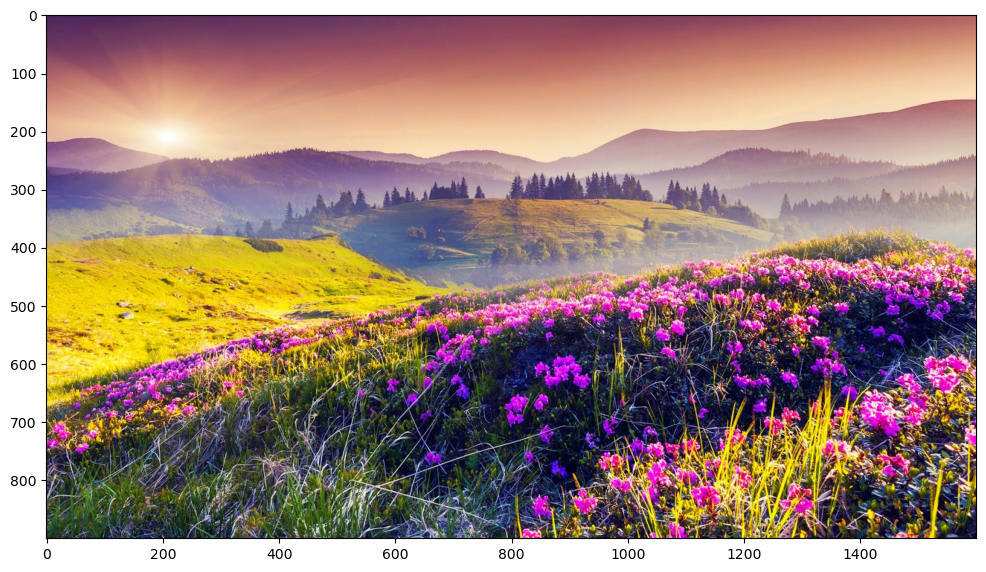

In [16]:
import numpy as np
from matplotlib.image import imread
import matplotlib.pyplot as plt

image_raw = imread("anh-nhin-nen-ep-canh-dong-hoa-mau-tim_085322447.jpeg")
print(image_raw.shape)

# Displaying the image
plt.figure(figsize=[12,8])
plt.imshow(image_raw)

(900, 1600)
1.0


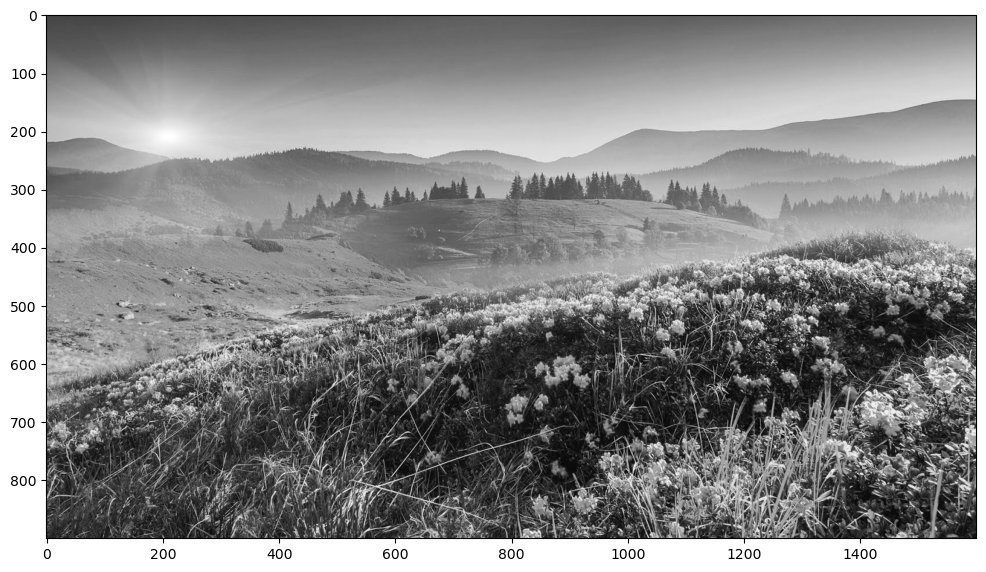

In [17]:
image_sum = image_raw.sum(axis=2)
print(image_sum.shape)

image_bw = image_sum/image_sum.max()
print(image_bw.max())

plt.figure(figsize=[12,8])
plt.imshow(image_bw, cmap=plt.cm.gray)


Number of components explaining 95% variance: 150


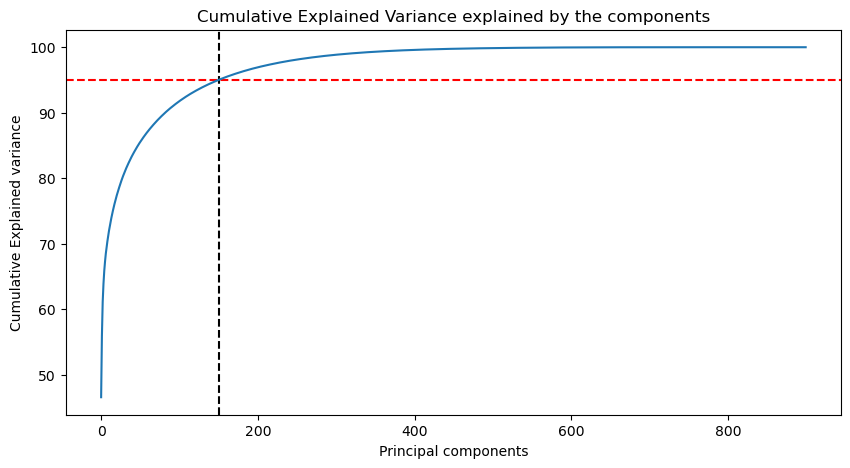

In [20]:
from sklearn.decomposition import PCA, IncrementalPCA
pca = PCA()
pca.fit(image_bw)

# lấy variance tích luỹ
# explained_variance_ratio_ sử dụng để lấy tỷ lệ phương sai (giá trị riêng/tổng giá trị riêng)
# 
a = pca.explained_variance_ratio_;
# print(a)

var_cumu = np.cumsum(pca.explained_variance_ratio_)*100
# print(var_cumu)

# How many PCs explain 95% of the variance?
k = np.argmax(var_cumu>95)
print("Number of components explaining 95% variance: "+ str(k))
#print("\n")

plt.figure(figsize=[10,5])

plt.title('Cumulative Explained Variance explained by the components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axvline(x=k, color="k", linestyle="--")
plt.axhline(y=95, color="r", linestyle="--")
ax = plt.plot(var_cumu)


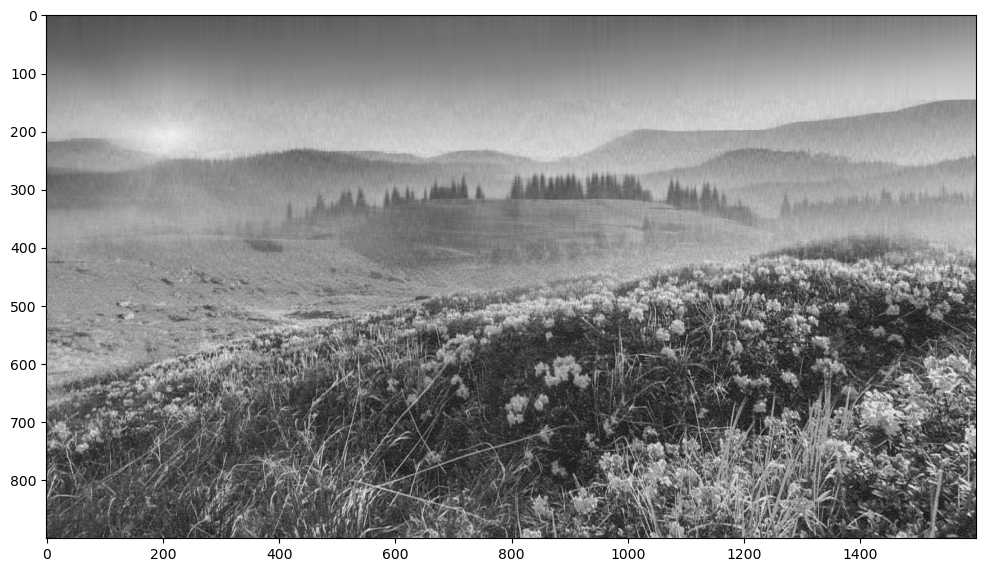

In [21]:
ipca = IncrementalPCA(n_components=k)
image_recon = ipca.inverse_transform(ipca.fit_transform(image_bw))

# Plotting the reconstructed image
plt.figure(figsize=[12,8])
plt.imshow(image_recon,cmap = plt.cm.gray)

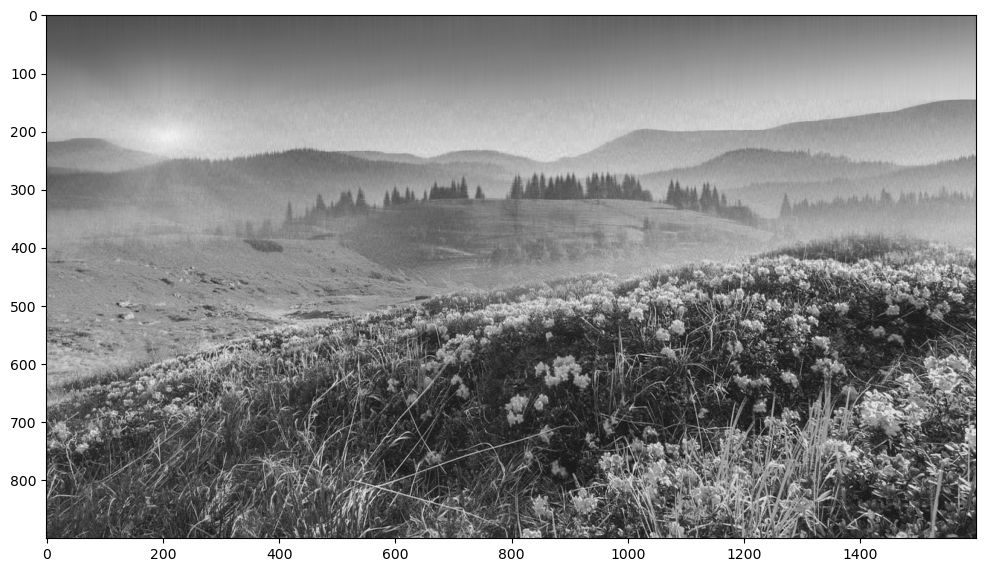

In [22]:
# Function to reconstruct and plot image for a given number of components

def plot_at_k(k):
    ipca = IncrementalPCA(n_components=k)
    image_recon = ipca.inverse_transform(ipca.fit_transform(image_bw))
    plt.imshow(image_recon,cmap = plt.cm.gray)
    

k = 244
plt.figure(figsize=[12,8])
plot_at_k(k)

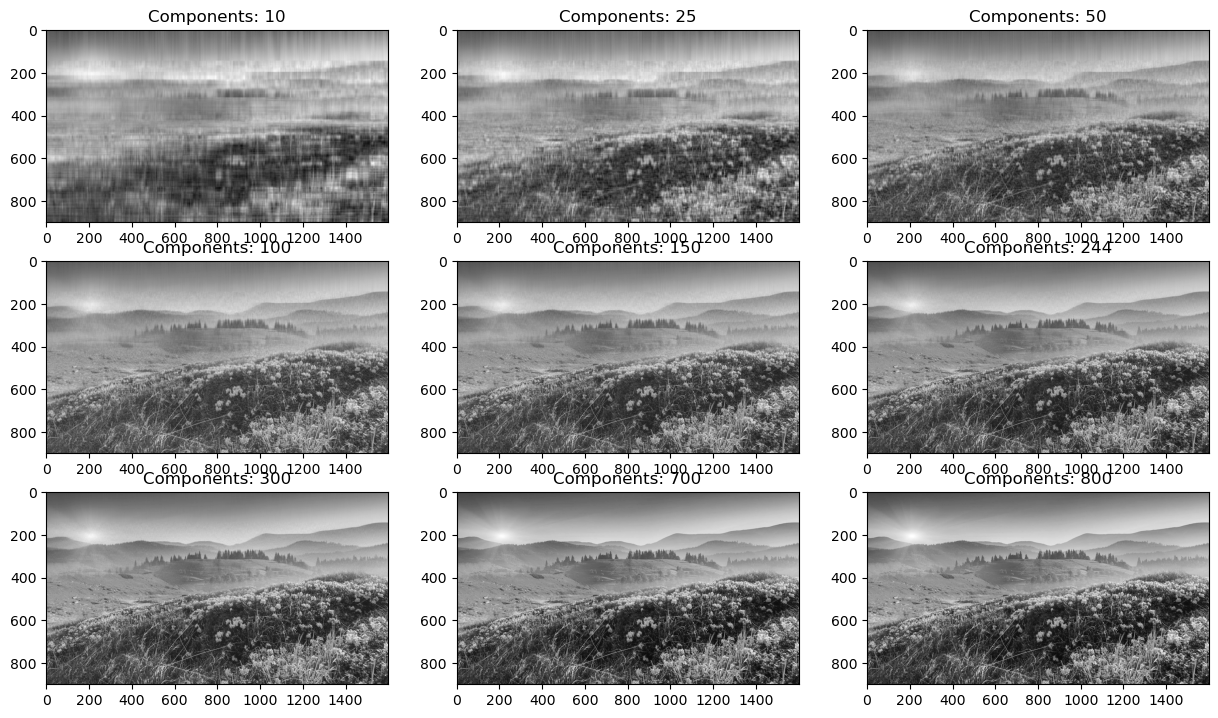

In [23]:
ks = [10, 25, 50, 100, 150, 244, 300, 700, 800 ]

plt.figure(figsize=[15,9])

for i in range(9):
    plt.subplot(3,3,i+1)
    plot_at_k(ks[i])
    plt.title("Components: "+str(ks[i]))

plt.subplots_adjust(wspace=0.2, hspace=0.0)
plt.show()